In [13]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [14]:
import sys
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
sys.path.append('/home/jma819/post_cmfe_analysis')
import dlc_utils as dlc

In [15]:
data_folder = '/projects/b1118/miniscope/analysis/compiled_data/mm_tracking_output/'

In [16]:
mm_raw_traces = glob.glob(data_folder+'*raw_trace.csv')
mm_speed_files = glob.glob(data_folder+'*speedtrace.csv')

In [17]:
#move to quest
#res_files=8f796c9e-f5c8-11e5-9842-22000b9da45e
#quest=d5990400-6d04-11e5-ba46-22000b92c6ec
#res_files_base_dir = '8f796c9e-f5c8-11e5-9842-22000b9da45e:/rdss/jma819/fsmresfiles/Projects/JJM/MiniscopeMovies/scope_data/'
#quest_dir = 'd5990400-6d04-11e5-ba46-22000b92c6ec:/projects/b1118/behaviorvideos/timestampfiles/'

In [18]:
#for session in list(time_stamp_file_locations.keys()):
#    transfer_info = res_files_base_dir+time_stamp_file_locations[session]+' '+quest_dir+session+'_timestamp.dat'
#    !eval "globus transfer" $transfer_info

In [19]:
sessions = [f_path.split('/')[-1].rstrip('_raw_trace.csv') for f_path in mm_raw_traces]

In [20]:
sessions = ['GRIN039_H14_M8_S53', 'GRIN026_H16_M35_S34', 'GRIN032_H16_M49_S22']

In [21]:
for session in sessions:
    print(session)
    timestampfile = '/projects/b1118/behaviorvideos/timestampfiles/'+session+'_timestamp.dat'
    frame_clock_df = pd.read_table(timestampfile)
    output_directory = '/projects/b1118/miniscope/analysis/compiled_data/mm_tracking_output/'

    Cam0_timestamps = frame_clock_df[frame_clock_df['camNum'] == 0]  
    Cam1_timestamps = frame_clock_df[frame_clock_df['camNum'] == 1]
    #beavCam is usually faster framerate 
    if Cam1_timestamps['sysClock'].iloc[1:].diff().mean()<Cam0_timestamps['sysClock'].iloc[1:].diff().mean():
        msCam_camnum=0
        behavCam_camnum=1
    elif Cam0_timestamps['sysClock'].iloc[1:].diff().mean()<Cam1_timestamps['sysClock'].iloc[1:].diff().mean():
        msCam_camnum=1
        behavCam_camnum=0

    raw_trace = pd.read_csv(data_folder+session+'_raw_trace.csv', names=['velocity'])
    raw_trace_filtered = pd.read_csv(data_folder+session+'_raw_trace_median_filter.csv', names=['velocity(20_Hz_filtered)'])
    speed_trace = pd.read_csv(data_folder+session+'_speedtrace.csv', names=['speed_trace(velocity_5Hz_filtered)'])
    raw_traces = pd.concat([raw_trace, raw_trace_filtered], axis=1)

    # align the raw traces for comparison

    mm_tracking_aligned = dlc.downsample_mmtracking(raw_traces, timestampfile, msCam_camnum, behavCam_camnum)

    # convert to timedelta for downsampling 
    aligned_td = mm_tracking_aligned.set_index(pd.to_timedelta(np.linspace(0, mm_tracking_aligned['sys_clock_behavCam'].values[-1]/1000, len(mm_tracking_aligned)), unit='s'), drop=False)
    aligned_td.to_csv(output_directory+session+'_mm_tracking_foranalysis_unsmoothed'+'.csv')

  0%|          | 42/32697 [00:00<01:17, 419.72it/s]

GRIN039_H14_M8_S53


  0%|          | 38/25930 [00:00<01:09, 372.88it/s]

GRIN026_H16_M35_S34


  0%|          | 0/36996 [00:00<?, ?it/s]

GRIN032_H16_M49_S22


100%|██████████| 36996/36996 [01:58<00:00, 311.61it/s]


In [143]:
aligned_td

,velocity,velocity(20_Hz_filtered),index,frameNum,camNum,sysClock,buffer,behavCam_frames,sys_clock_behavCam
0 days 00:00:00,0.010296,0.094921,0,1,0,0,1,1,0
0 days 00:00:00.050967172,0.010296,0.094921,1,2,0,9,1,1,0
0 days 00:00:00.101934344,0.013000,0.094921,2,3,0,59,2,3,63
0 days 00:00:00.152901516,0.076420,0.091110,3,4,0,177,1,6,158
0 days 00:00:00.203868688,0.522950,0.087298,4,5,0,180,1,7,196
...,...,...,...,...,...,...,...,...,...
0 days 00:22:21.201131312,0.000000,0.000000,26315,26316,0,1341196,1,37918,1341181
0 days 00:22:21.252098484,0.037202,0.000000,26316,26317,0,1341249,1,37920,1341246
0 days 00:22:21.303065656,0.000000,0.000000,26317,26318,0,1341297,1,37922,1341310
0 days 00:22:21.354032828,0.003606,0.000000,26318,26319,0,1341347,1,37923,1341341


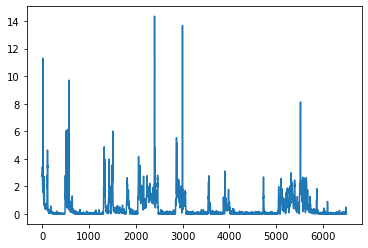

In [88]:
plt.plot(speed_trace['speed_trace(velocity_5Hz_filtered)'])
plt.show()

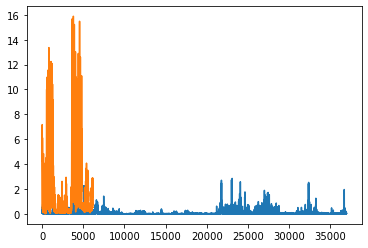

In [49]:
plt.plot(raw_trace['velocity'])
plt.plot(speed_trace['velocity_5Hz_filtered'])
plt.show()

In [50]:
speed_trace

,velocity_5Hz_filtered
0,4.26720
1,4.52560
2,4.77620
3,4.95840
4,5.18450
...,...
6162,0.52988
6163,0.53292
6164,0.53609
6165,0.50607
